# Pensamiento cumputacional: Programación clásica Vs Maching Learnig

**Pensamiento computacional**: Es el proceso de pensamiento que permite formular o resolver problemas del mundo que nos rodea haciendo uso de habilidades y técnicas, como las secuencias e instrucciones ordenadas (algoritmos), para llegar a la solución. Por lo tanto es una habilidad cognitiva.

**Programación clásica:**  Una persona escribe un conjunto de instrucciones (código) que le dicen al ordenador cómo realizar una tarea específica. La persona ejecuta las instrucciones para producir un resultado.

**Maching learning:** Se proporciona al ordenador un conjunto de datos y se le enseña a reconocer patrones o relaciones en esos datos. A partir de esta "aprendizaje", el programa puede hacer predicciones o decisiones por sí mismo. (Con un porcentaje o probadilidad de acierto) y que en muchas ocasiones no está cerca del 100% o del 1

En este primer ejemplo aplicamos la técnica de Programación clásica


In [3]:
# Programa: Adivina el número secreto

# Importamos la función randint, de generación de números enteros aleatorios,
# de la librería random
from random import randint

# Generamos un número aleatorio entre 1 y 100
numero_secreto = randint(1,100)

# Saludamos al usuario o usuaria
print("¡Bienvenidos y bienvenidas al juego Adivina el número secreto!")
print("Trata de averiguar el número misterioso que acabo de pensar...")
print("Solo puedo decirte que está entre 1 y 100")



# Inicializamos la variable apuesta a un valor imposible
apuesta = -1
#Inicializamos la variable contadora de intento
contador = 0
# Creamos bucle de juego
while apuesta != numero_secreto:

    apuesta = int(input("¿Cuál crees que es el número secreto? "))
    contador = contador + 1

    if apuesta == numero_secreto:
        print("¡Toma! ¡Felicidades!")
        print ("Has necesitado {} intentos".format(contador))

    else:
        if apuesta < numero_secreto:
            print("El número secreto es mayor...")
        else:
            print("El número secreto es menor...")


¡Bienvenidos y bienvenidas al juego Adivina el número secreto!
Trata de averiguar el número misterioso que acabo de pensar...
Solo puedo decirte que está entre 1 y 100
El número secreto es menor...
El número secreto es mayor...
El número secreto es menor...
El número secreto es mayor...
El número secreto es mayor...
El número secreto es mayor...
¡Toma! ¡Felicidades!
Has necesitado {contador} intentos


En este primer ejemplo aplicamos la técnica de Programación clásica

**Clasificación de imágenes de prendas de ropa con redes neuronales densas**

---
<div align="center"><img src="https://github.com/zalandoresearch/fashion-mnist/blob/master/doc/img/fashion-mnist-sprite.png?raw=true"></div>

---


In [4]:
# Clasificación de imágenes de prendas de ropa por IA -> Aprendizaje Automático -> Deep Learning / Aprendizaje profundo --> Redes neuronales densas

# Consulta del dataset
# https://www.tensorflow.org/datasets/catalog/fashion_mnist?hl=es-419
# https://github.com/zalandoresearch/fashion-mnist

# Cargar las librerías Tensorflow, Numpy y Matplotlib
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


ModuleNotFoundError: No module named 'keras'

In [ ]:
# Carga el datset y realiza la división entre tarin t test
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


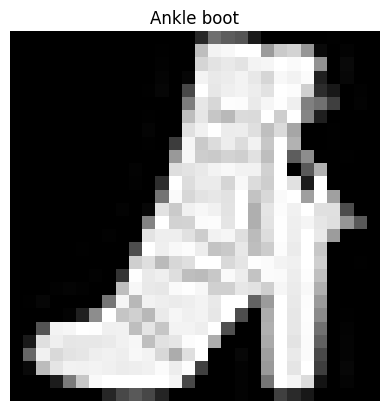

In [ ]:
# Para visualizar una imagen
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Elige un índice de imagen para visualizar
index = 11
# Muestra la imagen y su etiqueta
plt.imshow(x_train[index], cmap='gray')
plt.title(class_labels[y_train[index]])
plt.axis('off')
plt.show()

In [ ]:
np.set_printoptions(linewidth=np.inf) # Para evitar que se dividan las filas en la celda de  resultado
print (x_train[index])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0  39 111  93  85  27   0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0   0 190 244 248 255 255 155 202 212 150   9   0   3   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   2   0   0 213 227 233 227 243 246 255 250 255 146   0   9   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   4   0   6 244 233 236 244 232 214 248 242 251  33   0   7   0   0]
 [  0   0   0   0   0   0   0   0   0   0   1   6   0  72 255 231 239 244 237 226 255 252 207  44  24   0   2   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 125 231 215 253 252 234 246 254 239 128 114  63   0   3   0]
 [  0   0   0   0   0   0   0   0   0   0   1   0   0 189 230 198 185 219 218 255 206 255 133  31   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   4   0   0 224 241 255 236 237 223 191 219 166   0   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   1   0  61 245 202 220 237 220 242 19

In [ ]:
x_train = x_train / 255.0 # Normaliza entre 0 y 1, ya que la escala de grises es con 255 valores.
                          # En el contexto de las imágenes, los valores de los píxeles suelen ser enteros en el rango de 0 a 255, donde 0 representa el negro y 255 representa el blanco.
                          # Al dividir los valores de los píxeles por 255, se realiza una normalización que escala los valores a un rango de 0 a 1.
                          # Las redes neuronales funcionan mejor con valores comprendidos en el rango entre 0 y 1
x_test = x_test / 255.0

In [ ]:
# Definimos la red neuronal
#  Aplicando función de activación: ReLU
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(64, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')
                        ])
model.summary()
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Entranamos la red neuronal
history=model.fit(x_train, y_train, epochs=20, validation_split = 0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
1500/1500 [==============================] - 12s 7ms/step - loss: 0.7933 - accuracy: 0.7404 - val_loss: 0.5610 - val_accuracy: 0.8052
Epo

In [ ]:
# Evaluamos la red entrenada con los datos de test
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.35981041193008423
Test accuracy: 0.870199978351593


In [ ]:
# Ejercicio: Prueba a entrenar la red neuronal sin normalizar los valores de los data sets. ¿qué valor obtiene el accuracy?

# Realizemos las predicciones

In [ ]:
# En este caso realizamos realizamos la predicción con todo el conjunto de test y posteriormente comprobaremos si la predicción ha sido acertada
y_pred = model.predict(x_test)



313/313 [==============================] - 1s 2ms/step


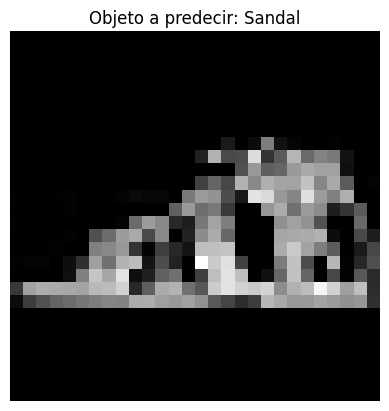

Probabilidad de cada uno de los posibles valores: [9.5984498e-05 7.9184720e-06 5.1293820e-05 1.8705960e-05 3.1909040e-05 9.9692327e-01 2.8158218e-04 9.9759747e-04 3.8028718e-04 1.2113281e-03]
Posición (número) de mayor probabilidad: 5
Nombre del objeto: Sandal
Suma de todas las probabilidades calculada para posible etiqueta/clase: 0.9999998807907104


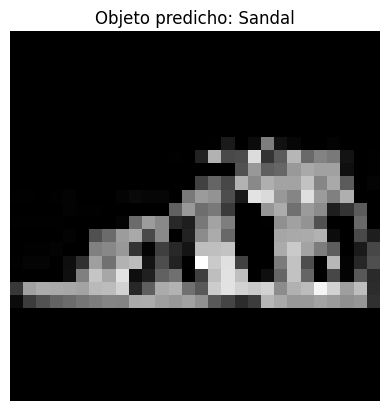

In [ ]:
# Vamnos a realizar una predicción utilizando uno de los ejemplos que tenemos disponibles en los datos de test
# Para ello visualizaremos primero un elemento y posteriormente comprobaremos si el modelo lo puede predecir e identificar (clasificar) correctamente

# Elige un índice de imagen para visualizar y que se intentará predecir
index = 11
# index = 12
# index = 13

# Muestra la imagen y su etiqueta
plt.imshow(x_test[index], cmap='gray')
plt.title(f"Objeto a predecir: {class_labels[y_test[index]]}")
plt.axis('off')
plt.show()


# La imagen de la posición 11 es un "Sandal", que es lo que debería devolver la predicción
# Muestra el array de probabilidades del elemento buscado
print(f"Probabilidad de cada uno de los posibles valores: {y_pred[index]}")
# Muestra la posición (número) de mayor probabilidad
max_prob = np.argmax(y_pred[index])
print(f"Posición (número) de mayor probabilidad: {max_prob}")
print (f"Nombre del objeto: {class_labels[max_prob]}")
# Muestra la suma de todas las probabilidades calculada para posible etiqueta/clase

print(f"Suma de todas las probabilidades calculada para posible etiqueta/clase: {np.sum(y_pred[index])}")

# Muestra la imagen a predecir y la etiqueta predicha
plt.imshow(x_test[index], cmap='gray')
plt.title(f"Objeto predicho: {class_labels[max_prob]}")
plt.axis('off')
plt.show()

In [ ]:
# Probar a cambiar el valor del objeto / imagen a predecir en la celda anterior y comprobar si la predicción es acertada